In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import statistics
import math
import matplotlib.image as image
from PIL import Image
import matplotlib.animation

%matplotlib notebook


In [2]:
directory = input("Enter directory number: ")
file = input("Enter file number: ")

Enter directory number: 7558
Enter file number: 13


In [3]:
csv_url=r'C:\Users\Israel Gitler\Desktop\drawings project\train\train\{dir}\SimpleTest\{file}.csv'.format(dir=directory, file=file)
df = pd.read_csv(csv_url, sep=',')
png_url=r'C:\Users\Israel Gitler\Desktop\drawings project\train\train\{dir}\SimpleTest\{file}.png'.format(dir=directory, file=file)
img=image.imread(png_url)

## let's look at the png image of the drawing

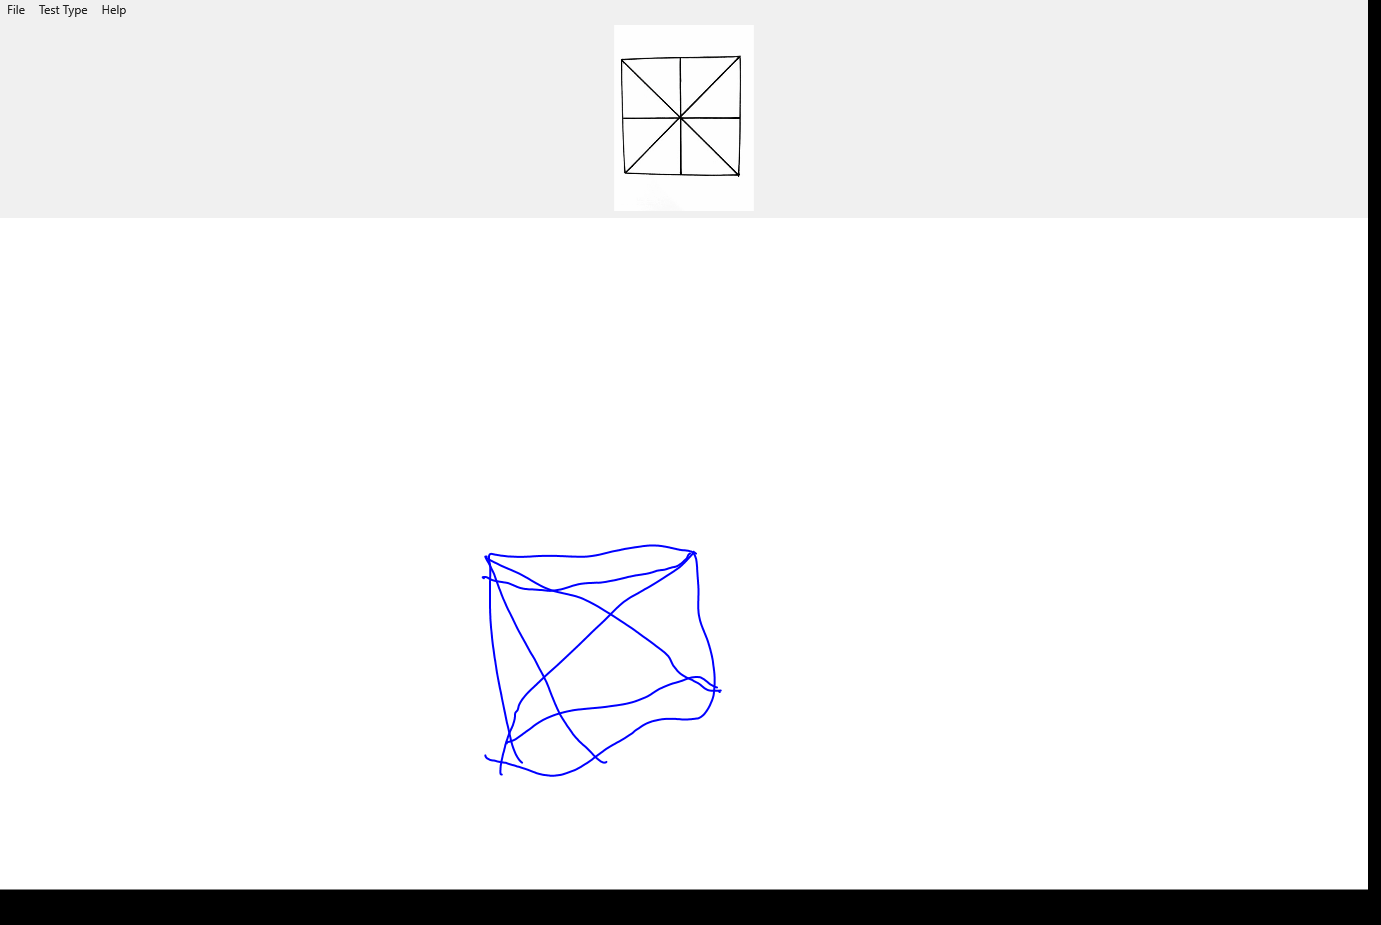

In [4]:
image=Image.open(png_url)
image

## Let's look at a simulation of the drawing! 

<IPython.core.display.Javascript object>


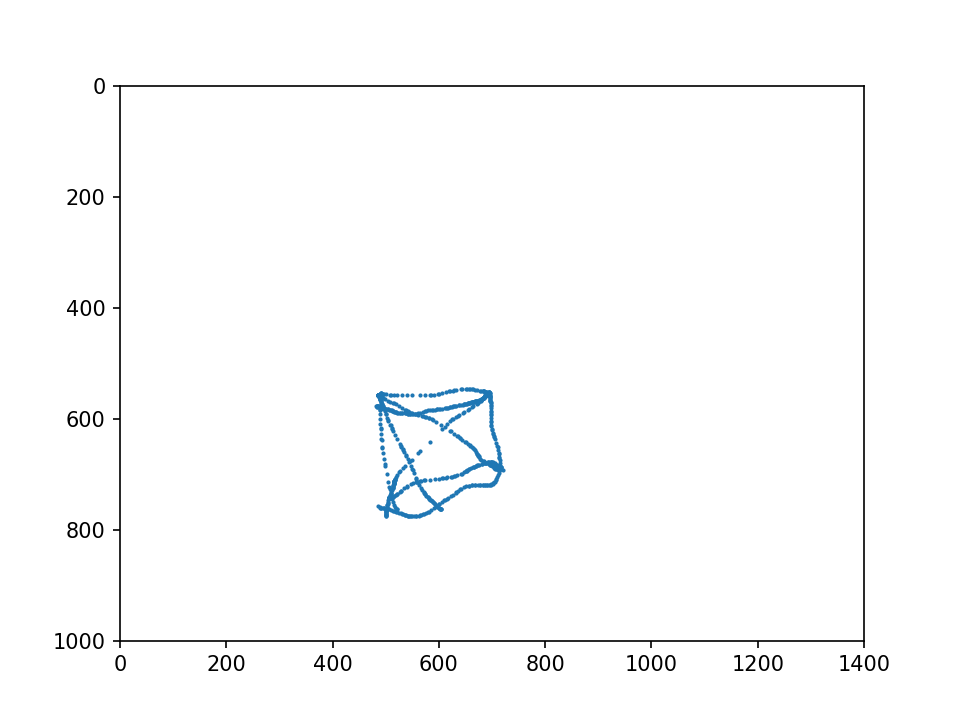

In [5]:


fig, ax = plt.subplots()
x, y = [],[]
sc = ax.scatter(x,y, s=1)
plt.xlim(0,1400)
plt.ylim(0,1000)
plt.gca().invert_yaxis()

def animate(i):
    x.append(df['X'][i])
    y.append(df[' Y'][i])
    sc.set_offsets(np.c_[x,y])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                interval=10) 
plt.show()

In [6]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,521.511490934288,762.229357,0.310048,2980.0,-1552.0,00:02.7561277
1,517.930476960388,757.963737,0.372549,2980.0,-1552.0,00:02.7717617
2,516.034646033029,754.804019,0.439689,2980.0,-1552.0,00:02.7874170
3,513.559533433422,748.905878,0.522698,2980.0,-1552.0,00:02.8030015
4,511.769026446472,743.429033,0.569818,2980.0,-1552.0,00:02.8186570
...,...,...,...,...,...,...
720,603.295530661739,762.492667,0.706294,3432.0,-2503.0,00:22.6005805
721,603.611502482966,762.545329,0.697993,3416.0,-2531.0,00:22.6005805
722,604.506755976441,762.650653,0.671138,3381.0,-2590.0,00:22.6005805
723,Time Elapsed till drawing started: 00:02.7561277,NaN,NaN,NaN,NaN,NaN


## We can see that the last 2 lines are a summary and are not really needed

In [7]:
time_summary = df.iloc[-2:]
df = df.iloc[:-2]
df

,X,Y,Pressure,TiltX,TiltY,Time
0,521.511490934288,762.229357,0.310048,2980.0,-1552.0,00:02.7561277
1,517.930476960388,757.963737,0.372549,2980.0,-1552.0,00:02.7717617
2,516.034646033029,754.804019,0.439689,2980.0,-1552.0,00:02.7874170
3,513.559533433422,748.905878,0.522698,2980.0,-1552.0,00:02.8030015
4,511.769026446472,743.429033,0.569818,2980.0,-1552.0,00:02.8186570
...,...,...,...,...,...,...
718,601.820995496016,761.860723,0.729000,3449.0,-2474.0,00:22.5537090
719,602.242291257651,762.071371,0.723873,3449.0,-2474.0,00:22.5850199
720,603.295530661739,762.492667,0.706294,3432.0,-2503.0,00:22.6005805
721,603.611502482966,762.545329,0.697993,3416.0,-2531.0,00:22.6005805


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          723 non-null    object 
 1    Y         723 non-null    float64
 2    Pressure  723 non-null    float64
 3    TiltX     723 non-null    float64
 4    TiltY     723 non-null    float64
 5    Time      723 non-null    object 
dtypes: float64(4), object(2)
memory usage: 34.0+ KB


## We can see that the X column is an object and not float, so we'll change that

In [10]:
df['X'] = df['X'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          723 non-null    float64
 1    Y         723 non-null    float64
 2    Pressure  723 non-null    float64
 3    TiltX     723 non-null    float64
 4    TiltY     723 non-null    float64
 5    Time      723 non-null    object 
dtypes: float64(5), object(1)
memory usage: 34.0+ KB


<ipython-input-10-8c9c5a69c5aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = df['X'].astype('float64')


# Datetime/float

We saw that although datetime has a lot of options to work with' we preffered to change the time to float.. 
and we didn't want to add columns that we will not use..

In [11]:
df['Time_sec'] = df[' Time'].apply(lambda x: float(x.split(":")[0])*60+float(x.split(":")[1]))
df

<ipython-input-11-94fde8d7062a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_sec'] = df[' Time'].apply(lambda x: float(x.split(":")[0])*60+float(x.split(":")[1]))


,X,Y,Pressure,TiltX,TiltY,Time,Time_sec
0,521.511491,762.229357,0.310048,2980.0,-1552.0,00:02.7561277,2.756128
1,517.930477,757.963737,0.372549,2980.0,-1552.0,00:02.7717617,2.771762
2,516.034646,754.804019,0.439689,2980.0,-1552.0,00:02.7874170,2.787417
3,513.559533,748.905878,0.522698,2980.0,-1552.0,00:02.8030015,2.803002
4,511.769026,743.429033,0.569818,2980.0,-1552.0,00:02.8186570,2.818657
...,...,...,...,...,...,...,...
718,601.820995,761.860723,0.729000,3449.0,-2474.0,00:22.5537090,22.553709
719,602.242291,762.071371,0.723873,3449.0,-2474.0,00:22.5850199,22.585020
720,603.295531,762.492667,0.706294,3432.0,-2503.0,00:22.6005805,22.600580
721,603.611502,762.545329,0.697993,3416.0,-2531.0,00:22.6005805,22.600580


## we added a column of the change in the time between each line and the previous one

In [12]:
df['Shift']=df['Time_sec'].shift(periods=1)
df['Time_change']=df['Time_sec'].sub(df['Shift'])
df=df.drop('Shift', axis=1)
df['Time_change'][0]=0
df

<ipython-input-12-2fab7cc4a90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shift']=df['Time_sec'].shift(periods=1)
<ipython-input-12-2fab7cc4a90f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_change']=df['Time_sec'].sub(df['Shift'])
<ipython-input-12-2fab7cc4a90f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,X,Y,Pressure,TiltX,TiltY,Time,Time_sec,Time_change
0,521.511491,762.229357,0.310048,2980.0,-1552.0,00:02.7561277,2.756128,0.000000
1,517.930477,757.963737,0.372549,2980.0,-1552.0,00:02.7717617,2.771762,0.015634
2,516.034646,754.804019,0.439689,2980.0,-1552.0,00:02.7874170,2.787417,0.015655
3,513.559533,748.905878,0.522698,2980.0,-1552.0,00:02.8030015,2.803002,0.015585
4,511.769026,743.429033,0.569818,2980.0,-1552.0,00:02.8186570,2.818657,0.015655
...,...,...,...,...,...,...,...,...
718,601.820995,761.860723,0.729000,3449.0,-2474.0,00:22.5537090,22.553709,0.000000
719,602.242291,762.071371,0.723873,3449.0,-2474.0,00:22.5850199,22.585020,0.031311
720,603.295531,762.492667,0.706294,3432.0,-2503.0,00:22.6005805,22.600580,0.015561
721,603.611502,762.545329,0.697993,3416.0,-2531.0,00:22.6005805,22.600580,0.000000


## We added a column of the distance between a point and the previous one

In [13]:
distance=[None]
distance.extend([math.sqrt(math.pow((df.iloc[i]['X']-df.iloc[i-1]['X']),2)+math.pow((df.iloc[i][' Y']-df.iloc[i-1][' Y']),2)) for i in range(1,len(df))])
df['Distance']= distance
#for i in range(1,len(df)):
    #df.iloc[i]['Distance']=sqrt(math.sqrt(math.pow((df.iloc[i+1]['X']-df.iloc[i]['X']),2)+math.pow((df.iloc[i+1][' Y']-df.iloc[i][' Y']),2)))
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_sec,Time_change,Distance
0,521.511491,762.229357,0.310048,2980.0,-1552.0,00:02.7561277,2.756128,0.000000,NaN
1,517.930477,757.963737,0.372549,2980.0,-1552.0,00:02.7717617,2.771762,0.015634,5.569486
2,516.034646,754.804019,0.439689,2980.0,-1552.0,00:02.7874170,2.787417,0.015655,3.684833
3,513.559533,748.905878,0.522698,2980.0,-1552.0,00:02.8030015,2.803002,0.015585,6.396424
4,511.769026,743.429033,0.569818,2980.0,-1552.0,00:02.8186570,2.818657,0.015655,5.762096
...,...,...,...,...,...,...,...,...,...
718,601.820995,761.860723,0.729000,3449.0,-2474.0,00:22.5537090,22.553709,0.000000,1.272634
719,602.242291,762.071371,0.723873,3449.0,-2474.0,00:22.5850199,22.585020,0.031311,0.471023
720,603.295531,762.492667,0.706294,3432.0,-2503.0,00:22.6005805,22.600580,0.015561,1.134374
721,603.611502,762.545329,0.697993,3416.0,-2531.0,00:22.6005805,22.600580,0.000000,0.320330


In [14]:
df.Distance[0]=0
df

<ipython-input-14-bd156ce15e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Distance[0]=0


,X,Y,Pressure,TiltX,TiltY,Time,Time_sec,Time_change,Distance
0,521.511491,762.229357,0.310048,2980.0,-1552.0,00:02.7561277,2.756128,0.000000,0.000000
1,517.930477,757.963737,0.372549,2980.0,-1552.0,00:02.7717617,2.771762,0.015634,5.569486
2,516.034646,754.804019,0.439689,2980.0,-1552.0,00:02.7874170,2.787417,0.015655,3.684833
3,513.559533,748.905878,0.522698,2980.0,-1552.0,00:02.8030015,2.803002,0.015585,6.396424
4,511.769026,743.429033,0.569818,2980.0,-1552.0,00:02.8186570,2.818657,0.015655,5.762096
...,...,...,...,...,...,...,...,...,...
718,601.820995,761.860723,0.729000,3449.0,-2474.0,00:22.5537090,22.553709,0.000000,1.272634
719,602.242291,762.071371,0.723873,3449.0,-2474.0,00:22.5850199,22.585020,0.031311,0.471023
720,603.295531,762.492667,0.706294,3432.0,-2503.0,00:22.6005805,22.600580,0.015561,1.134374
721,603.611502,762.545329,0.697993,3416.0,-2531.0,00:22.6005805,22.600580,0.000000,0.320330


## now after we finished organizing the data, we can start with the functions to calculate what we need:

## Length and mean pressure of the lines

In [15]:
#A function that calculates the length and mean pressure of each line in the drawing
def len_and_mean_pressure(lines):
    mean_pressures=[]
    lengths=[]
    for line in lines:
        pressure_sum=0
        line_length=0
        for dot in line:
            pressure_sum+=df[' Pressure'][dot]
            line_length+=df.Distance[dot]
        mean_pressure=pressure_sum/len(line)
        mean_pressures.append(mean_pressure)
        lengths.append(line_length)
        print('Line number ' +str(lines.index(line)+1)+ ' mean pressure is: ' +str(mean_pressure)+ ' and the length of it is: ' +str(line_length))


## The number of lifts

In [16]:
#A function that calculates the number of lifts in the drawing according to the time change and the distance
def lifts(df):
    lifts_sum=0
    for i in range(len(df)):
        if df.Distance[i] >= 20 and df.Time_change[i] >= 0.5:
            lifts_sum +=1
    return lifts_sum

## The number of lines

Before we get to the code of calculating the number of lines we wanted to say that there are a few ways to decide how many lines there are in the drawing. what we decided on is that any line that its' slope chages drasticly is a differet line. we know that according to it a circle isn't a 1 line as needed but a several- but like you taught us- in real life there are no perfect solutions..

The way we calculate is this: we take the first point and calculate the slope of the beginning of the drawing, then we calculate 2 perallel lines with 50 pixels from our line and they create the range- any small change between the range is still considered the same line. when the shape goes out of the range (because the slope changed drastically) then it is considered a different line and we start the process all over again from that point..  

In [17]:
#A function that calculates the slope to the line that starts with 'index'-
#according to the mean slope of the slops of the next 5 points
def find_slope(index):
    slopes=[]
    for i in range (1,6):
        if (df['X'][i]-df['X'][i+1])<0.0001 and (df['X'][i]-df['X'][i+1])> -0.0001:
            continue
        else:
            slope=(df[' Y'][i]-df[' Y'][i+1]) / (df['X'][i]-df['X'][i+1])
            slopes.append(slope)
    return statistics.mean(slopes)

#A function that calculates the intercept-b, in the line form- y=mx+b
def find_b(i, m):
    b=df[' Y'][i]-(-1/m)*df['X'][i]
    return b

#A function that calculates the 2 intercepts-b of the lines that define the range of our line (the m is the same)
def find_vectors(i, m):    
    #If slope is 0
    if (m == 0):
        x1 = df['X'][i] + 50
        y1 = df[' Y'][i]
 
        x2 = df['X'][i] - 50
        y2 = df[' Y'][i]
 
    #If slope is infinite
    elif math.isinf(m):
        x1 = df['X'][i]
        y1 = df[' Y'][i] + 50
 
        x2 = df['X'][i]
        y2 = df[' Y'][i] - 50
    
    else:
        dx = 50 / math.sqrt(1 + (m * m))
        dy = m * dx
        x1 = df['X'][i] + dx
        y1 = df[' Y'][i] + dy
        x2 = df['X'][i] - dx
        y2 = df[' Y'][i] - dy
        b1 = y1 - m*x1
        b2 = y2 - m*x2
    return b1, b2

#A function that calculates the distance between 2 points
def dis(x1, y1, x2, y2):
    d = math.sqrt(math.pow((x1-x2), 2) + math.pow((y1-y2), 2))
    return d

#A function that calculates the distances between the current point and the closest points in the range lines 
def find_dis(curr_i, m, b1, b2):
    curr_m = -1/m
    curr_b= df[' Y'][curr_i] - curr_m*df['X'][curr_i]
    curr_x1 = (curr_b-b1) / (m-curr_m)
    curr_y1= curr_m*curr_x1+curr_b
    
    curr_x2 = (curr_b-b2) / (m-curr_m)
    curr_y2= curr_m*curr_x2+curr_b
    
    dis1 =dis(df['X'][curr_i], df[' Y'][curr_i], curr_x1, curr_y1)
    dis2 =dis(df['X'][curr_i], df[' Y'][curr_i], curr_x2, curr_y2)
    
    return dis1, dis2
    
#A function that returns an arrays that contains the indexes of each line
def lines_indexes(df):
    lines=[]
    first_i=0
    m = find_slope(0)
    b = find_b(0, m)
    b1, b2 = find_vectors(0, m)
    i=1
    #because we calculate the slope-m with the next 5 points we stop at len(df)-6
    while i<len(df)-6:
        dis1, dis2 = find_dis(i, m, b1, b2)
        if dis1<100 and dis2<100:
            i+=1
        else:
            line= range(first_i,i)
            first_i=i
            lines.append(line)
            i+=1
            m = find_slope(i)
            b = find_b(i, m)
            b1, b2 = find_vectors(i, m)
    line= range(first_i,len(df))
    lines.append(line)        
    return lines
            
##A function that returns the number of lines in the drawing        
def count_lines(df):
    return len(lines_indexes(df)) 

## Is the shape open or closed?

In [18]:
#A function that cuts the top part of the png image (not part of the drawing)
def cut_image(img):
    for i in range(img.shape[0]):
        if(img[i][0][0]==1 and img[i][0][1]==1 and img[i][0][2]==1):
            new_img=img[i:]
            return new_img

#A function that calculate if the drawing is closed or open- 
# with the help of a copy of the image that it colors the outside of the drawing but not the inside(if it's closed)
def closed_or_open_shape(img):
    new_img=cut_image(img)
    # converting to black-white mat
    my_arr= []
    white_row=[]
    #we're adding a frame of white so if a line crosses from one side to the other it won't be a problem
    for i in range(new_img.shape[1]+2):
        white_row.append(1)
    my_arr.append(white_row)
    for i in range(new_img.shape[0]):
        new_row=[]
        new_row.append(1)
        for j in range(new_img.shape[1]):
            if(new_img[i][j][0]==1 and new_img[i][j][1]==1 and new_img[i][j][2]==1):
                new_row.append(1)
            else:
                new_row.append(0)
        new_row.append(1)
        my_arr.append(new_row)
    my_arr.append(white_row)
    my_arr=np.array(my_arr)

    # we are looking at each square- only if it's white: 
    # we color it and add all the squares around it (max 8) to the indexes that way, 
    # we will never reach the white squares that are inside a black shape
    indexes= {(0,0)}

    copy=my_arr.copy()

    while len(indexes)!=0:
        curr = indexes.pop()
        i=curr[0]
        j=curr[1]
        if copy[i][j] == 1:
            copy[i][j] = 2
            if i-1>=0:
                indexes.add((i-1,j))
                if j-1>=0:
                    indexes.add((i-1,j-1))
                if j+1<len(copy[0]):
                    indexes.add((i-1,j+1))
            if i+1 < len(copy):
                indexes.add((i+1,j))
                if j-1>=0:
                    indexes.add((i+1,j-1))
                if j+1<len(copy[0]):
                    indexes.add((i+1,j+1))
            if j-1>=0:
                indexes.add((i,j-1))   
            if j+1<len(copy[0]):
                    indexes.add((i,j+1))
    #now we will look if there are any white squares in the copy image- 
    #if so- it's a closed shape, and if not- it's an open shape
    flag=False
    for i in range(len(copy)):
        for j in range(len(copy[0])):
            if copy[i][j]==1:
                flag=True
                break
    if flag:        
        print("The shape is CLOSED")
    else:
        print("The shape is NOT CLOSED")
    #just for fun we'll show the colored image:)
    copy.shape
    plt.matshow(copy)
    plt.title("The image after we colored all the white pixels around the shapes\n")
    
    plt.colorbar()
    plt.show()

# Now we will answer the needed questions:

### How many lines are there in the drawing?

In [19]:
print("Number of lines : " + str(count_lines(df)))

Number of lines : 12


### what are the lengths and mean pressure of each line in the drawing?  

In [20]:
len_and_mean_pressure(lines_indexes(df))

Line number 1 mean pressure is: 0.8045244231575825 and the length of it is: 272.65656745831177
Line number 2 mean pressure is: 0.9440298999349276 and the length of it is: 124.57393780802157
Line number 3 mean pressure is: 0.9311355384447242 and the length of it is: 259.2434217258223
Line number 4 mean pressure is: 0.9483674168586732 and the length of it is: 108.28782542797065
Line number 5 mean pressure is: 0.7023565336581199 and the length of it is: 366.1734268418947
Line number 6 mean pressure is: 0.769034746174629 and the length of it is: 166.8405999303992
Line number 7 mean pressure is: 0.5506441821654637 and the length of it is: 240.3232160502898
Line number 8 mean pressure is: 0.7789465816397416 and the length of it is: 166.06680342279836
Line number 9 mean pressure is: 0.7645862698554993 and the length of it is: 42.60841626429976
Line number 10 mean pressure is: 0.578181977589409 and the length of it is: 391.65738620763074
Line number 11 mean pressure is: 0.773760821355077 and t

### How many lifts did the kid do while drawing?

In [21]:
print("Number of lifts : " + str(lifts(df)))

Number of lifts : 5


### Is the shape closed or open?

The shape is CLOSED


<IPython.core.display.Javascript object>


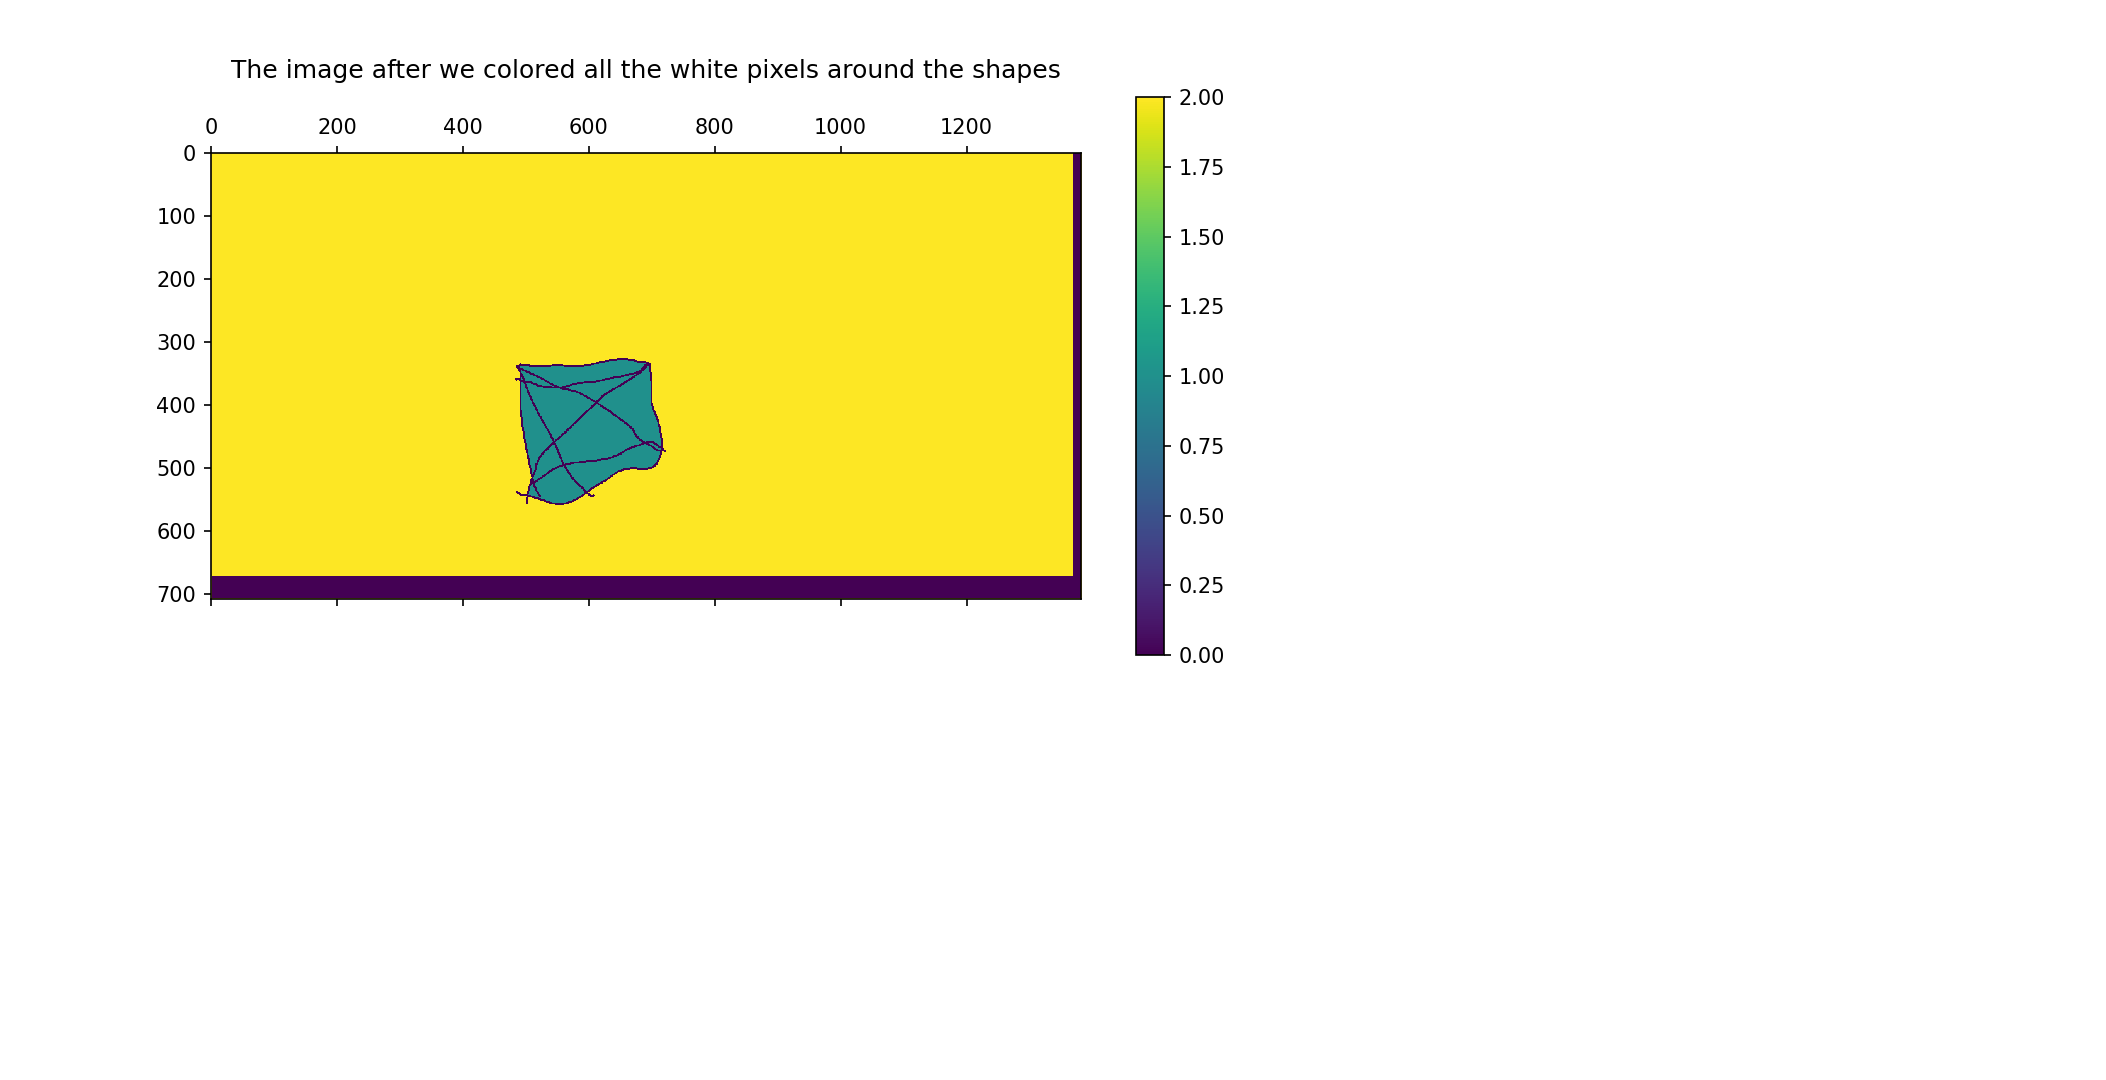

In [22]:
closed_or_open_shape(img)